In [95]:
import numpy as np
import numpy.random

# Моделирование данных датчика
def simulateSensor(samplesCount, noiseSigma, dt):
   # Шум с нормальным распределением. мат. ожидание = 0, среднеквадратичное отклонение = noiseSigma

   sample1 = int(samplesCount/2)
   sample2 = samplesCount - sample1 
   noise1 = numpy.random.normal(loc = 0.0, scale = noiseSigma, size = sample1)
   noise2 = numpy.random.normal(loc = 0.0, scale = noiseSigma+ 1.0, size = sample2)
   noise = np.concatenate([noise1, noise2])
   
   trajectory = np.zeros((3, samplesCount))

   position = 0
   velocity = 1.0
   acceleration = 0.0

   for i in range(1, samplesCount):
       position = position + velocity * dt + (acceleration * dt ** 2) / 2.0
       velocity = velocity + acceleration * dt
       acceleration = acceleration

       trajectory[0][i] = position
       trajectory[1][i] = velocity
       trajectory[2][i] = acceleration

   measurement = trajectory[0] + noise

   return trajectory, measurement # Истинное значение и данные "датчика" с шумом

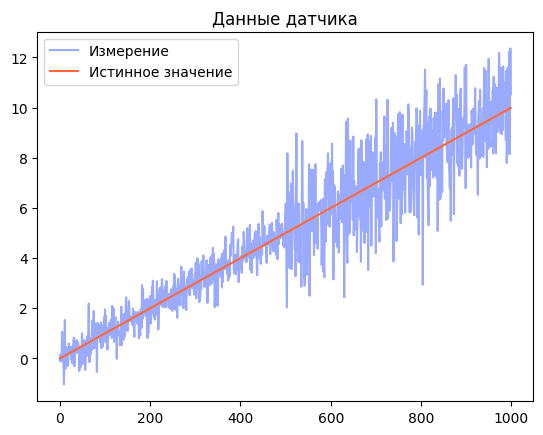

In [96]:
import matplotlib.pyplot as plt
dt = 0.01
measurementSigma = 0.5
trajectory, measurement = simulateSensor(1000, measurementSigma, dt)

plt.title("Данные датчика")
plt.plot(measurement, label="Измерение", color="#99AAFF")
plt.plot(trajectory[0], label="Истинное значение", color="#FF6633")
plt.legend()
plt.show()

[-0.10144728]
[0.4130567]
[-0.20205466]
[0.10438506]
[0.06026816]
[-0.11544555]
[-0.06182289]
[0.451854]
[-0.73525347]
[-0.28702726]
[0.10416615]
[-0.72093562]
[-0.05741794]
[0.09411776]
[1.49662322]
[0.14192249]
[0.62439687]
[0.56036564]
[-0.22297652]
[-0.91910244]
[-0.09022915]
[-0.26177534]
[-0.54492441]
[0.67081732]
[0.59491516]
[0.6931339]
[0.65604363]
[0.42634673]
[-0.46030805]
[-0.32537922]
[-0.74964905]
[1.6369461]
[0.30450527]
[-0.13300313]
[-0.10541919]
[-0.81950065]
[0.57023043]
[0.09138114]
[-0.16234033]
[0.15014892]
[-1.1422126]
[-0.2777986]
[-0.74942231]
[-0.35302089]
[-0.07847654]
[-0.31458026]
[-0.56864269]
[1.15407078]
[0.0859859]
[0.07431398]
[-0.26685409]
[0.75173976]
[-0.4451194]
[-0.87415419]
[0.01386852]
[-0.15911429]
[-0.55280554]
[0.98471358]
[-0.22321177]
[-0.88012915]
[-0.92075217]
[-0.32404214]
[-0.27152249]
[0.12203981]
[-0.63284616]
[0.09658364]
[-0.57250293]
[0.53638346]
[0.02508654]
[0.61388728]
[-0.03474858]
[-0.00346967]
[0.95671275]
[-0.14645818]
[-0.4

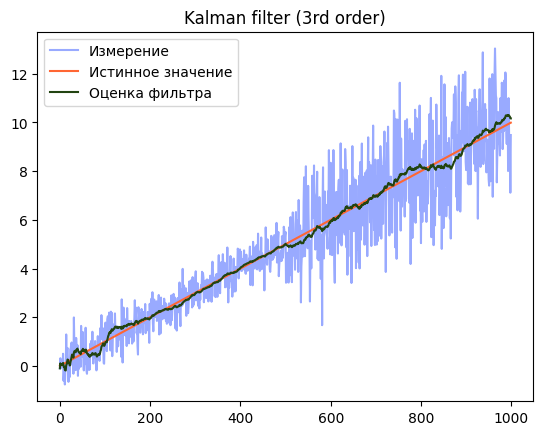

In [97]:
import filterpy.kalman
import filterpy.common
import matplotlib.pyplot as plt
import numpy as np
import numpy.random
#from Simulator import simulateSensor # моделирование датчиков

dt = 0.01                       # Шаг времени
measurementSigma = 0.5          # Среднеквадратичное отклонение датчика
processNoise = 1e-4             # Погрешность модели
processNoiseVariance = 1e-4

# Моделирование данных датчиков
trajectory, measurement = simulateSensor(1000, measurementSigma, dt)

# Создаём объект KalmanFilter
filter = filterpy.kalman.KalmanFilter(dim_x=3,      # Размер вектора стостояния
                                     dim_z=1)      # Размер вектора измерений

# F - матрица процесса - размер dim_x на dim_x - 3х3
filter.F = np.array([ [1,   dt,     (dt**2)/2],
                     [0,   1.0,    dt],
                     [0,   0,      1.0]])


# Матрица наблюдения - dim_z на dim_x - 1x3
filter.H = np.array([[1.0, 0.0, 0.0]])

# Ковариационная матрица ошибки модели
filter.Q = filterpy.common.Q_discrete_white_noise(dim=3, dt=dt, var=processNoiseVariance)

# Ковариационная матрица ошибки измерения - 1х1
filter.R =np.array([[measurementSigma*measurementSigma]])

# Начальное состояние.
filter.x = np.array([0.0, 0.0, 0.0])

# Ковариационная матрица для начального состояния
filter.P = np.array([[10.0, 0.0,  0.0],
                    [0.0,  10.0, 0.0],
                    [0.0,  0.0,  10.0]])

filteredState = []
stateCovarianceHistory = []



# Обработка данных
for i in range(0, len(measurement)):
   z = [ measurement[i] ]                      # Вектор измерений
   filter.predict()                            # Этап предсказания
   innovation = z - filter.H @ filter.x 
   print(innovation)
   filter.update(z)                            # Этап коррекции

   filteredState.append(filter.x)
   stateCovarianceHistory.append(filter.P)
 

filteredState = np.array(filteredState)
stateCovarianceHistory = np.array(stateCovarianceHistory)

# Визуализация
plt.title("Kalman filter (3rd order)")
plt.plot(measurement, label="Измерение", color="#99AAFF")
plt.plot(trajectory[0], label="Истинное значение", color="#FF6633")
plt.plot(filteredState[:, 0], label="Оценка фильтра", color="#224411")
plt.legend()
plt.show()

0.8 0.2
0.8 0.2
0.8 0.2
0.8 0.2
0.8 0.2
0.8 0.2
0.8 0.2
0.8 0.2
0.8 0.2
0.8 0.2
0.8 0.2
0.8 0.2
0.8 0.2
0.8 0.2
0.8 0.2
0.8 0.2
0.8 0.2
0.8 0.2
0.8 0.2
0.8 0.2
0.8 0.2
0.8 0.2
0.8 0.2
0.8 0.2
0.8 0.2
0.8 0.2
0.8 0.2
0.8 0.2
0.8 0.2
0.8 0.2
0.8 0.2
0.8 0.2
0.8 0.2
0.8 0.2
0.8 0.2
0.8 0.2
0.8 0.2
0.8 0.2
0.8 0.2
0.8 0.2
0.8 0.2
0.8 0.2
0.8 0.2
0.8 0.2
0.8 0.2
0.8 0.2
0.8 0.2
0.8 0.2
0.8 0.2
0.8 0.2
0.8 0.2
0.8 0.2
0.8 0.2
0.8 0.2
0.8 0.2
0.8 0.2
0.8 0.2
0.8 0.2
0.8 0.2
0.8 0.2
0.8 0.2
0.8 0.2
0.8 0.2
0.8 0.2
0.8 0.2
0.8 0.2
0.8 0.2
0.8 0.2
0.8 0.2
0.8 0.2
0.8 0.2
0.8 0.2
0.8 0.2
0.8 0.2
0.8 0.2
0.8 0.2
0.8 0.2
0.8 0.2
0.8 0.2
0.8 0.2
0.8 0.2
0.8 0.2
0.8 0.2
0.8 0.2
0.8 0.2
0.8 0.2
0.8 0.2
0.8 0.2
0.8 0.2
0.8 0.2
0.8 0.2
0.8 0.2
0.8 0.2
0.8 0.2
0.8 0.2
0.8 0.2
0.8 0.2
0.8 0.2
0.8 0.2
0.8 0.2
0.8 0.2
0.8 0.2
0.8 0.2
0.8 0.2
0.8 0.2
0.8 0.2
0.8 0.2
0.8 0.2
0.8 0.2
0.8 0.2
0.8 0.2
0.8 0.2
0.8 0.2
0.8 0.2
0.8 0.2
0.8 0.2
0.8 0.2
0.8 0.2
0.8 0.2
0.8 0.2
0.8 0.2
0.8 0.2
0.8 0.2
0.8 0.2
0.8 0.2


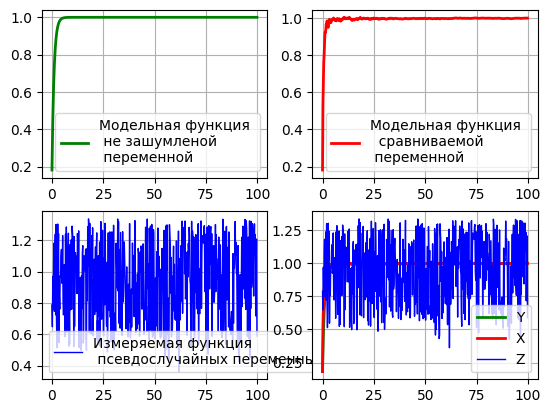

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from numpy import exp,sqrt
from scipy.stats import norm
Q=0.8;R=0.2;y=0;x=0#начальные дисперсии шумов(выбраны произвольно) и нулевые значения  переменных.
P=Q*R/(Q+R)# первая оценка дисперсий шумов.
T=5.0#постоянная времени.
n=[];X=[];Y=[];Z=[]#списки для переменных.
for i in np.arange(0,100,0.2):
                n.append(i)#переменная времени.    
                x=1-exp(-1/T)+x*exp(-1/T)#модельная функция для x.
                y=1-exp(-1/T)+y*exp(-1/T)# модельная функция для y.
                Y.append(y)#накопление списка значений y.
                X.append(x)# накопление списка значений x.
                norm1 = norm(y, sqrt(Q))# нормальное распределение с #математическим ожиданием – y.
                norm2 = norm(0, sqrt(R))# ))# нормальное распределение с #математическим ожиданием – 0.
                ravn1=np.random.uniform(0,2*sqrt(Q))#равномерное распределение #для шума с дисперсией Q.
                ravn2=np.random.uniform(0,2*sqrt(R))# равномерное распределение #для шума с дисперсией R.
                z=norm1.pdf( ravn1)+norm2.pdf( ravn2)#измеряемая переменная z.
                Z.append(z)# накопление списка значений z.
                P=P-(P**2)/(P+Q+R) #переход в новое состояние для x.
                x=(P*z+x*R)/(P+R)# новое состояние x.
                P=(P*R)/(P+R)# прогноз для нового состояния x.
                print(P)

plt.subplot(221)
plt.plot(n, Y, color='g',linewidth=2, label='Модельная функция \n не зашумленой \n переменной')
plt.legend(loc='best')
plt.grid(True)
plt.subplot(222)
plt.plot(n, X, color='r',linewidth=2, label='Модельная функция \n  сравниваемой \n переменной')
plt.legend(loc='best')
plt.grid(True)
plt.subplot(223)
plt.plot(n, Z, color='b', linewidth=1, label='Измеряемая функция \n псевдослучайных переменных')
plt.legend(loc='best')
plt.grid(True)
plt.subplot(224)
plt.plot(n, Y, color='g',linewidth=2, label='Y')
plt.plot(n, X, color='r',linewidth=2, label='X')
plt.plot(n, Z, color='b', linewidth=1, label='Z')
plt.legend(loc='best')
plt.grid(True)
plt.show()